In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [7]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


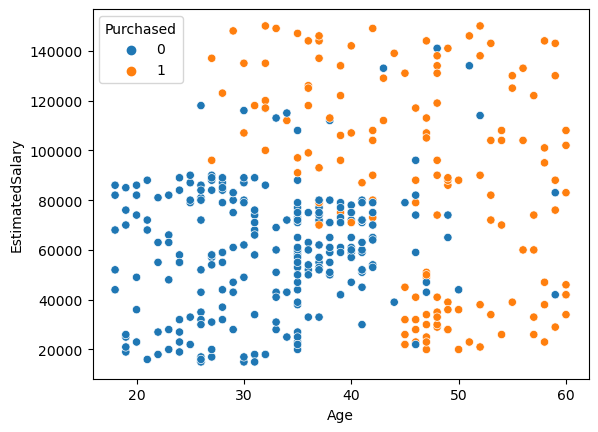

In [9]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.show()

In [10]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
sc.fit(x)  
x = pd.DataFrame(sc.transform(x), columns=x.columns)  

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [15]:
x_train.shape

(280, 2)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt= DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [18]:
dt1= DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
dt.score(x_test,y_test)*100

95.83333333333334

In [31]:
dt.score(x_train,y_train)*100

89.28571428571429

In [32]:
dt1.score(x_test,y_test)*100

85.83333333333333

D:\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


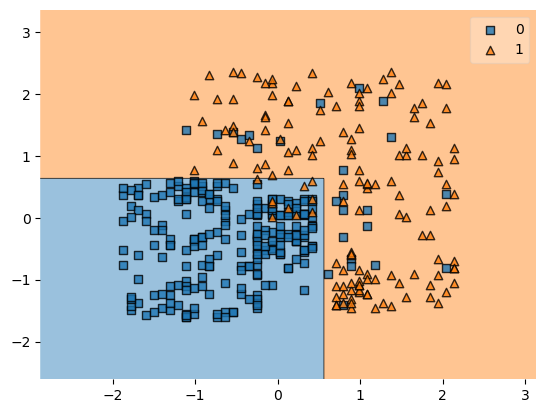

In [33]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [34]:
dt.predict([[43,86842]])

D:\New folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [35]:
from sklearn.tree import plot_tree

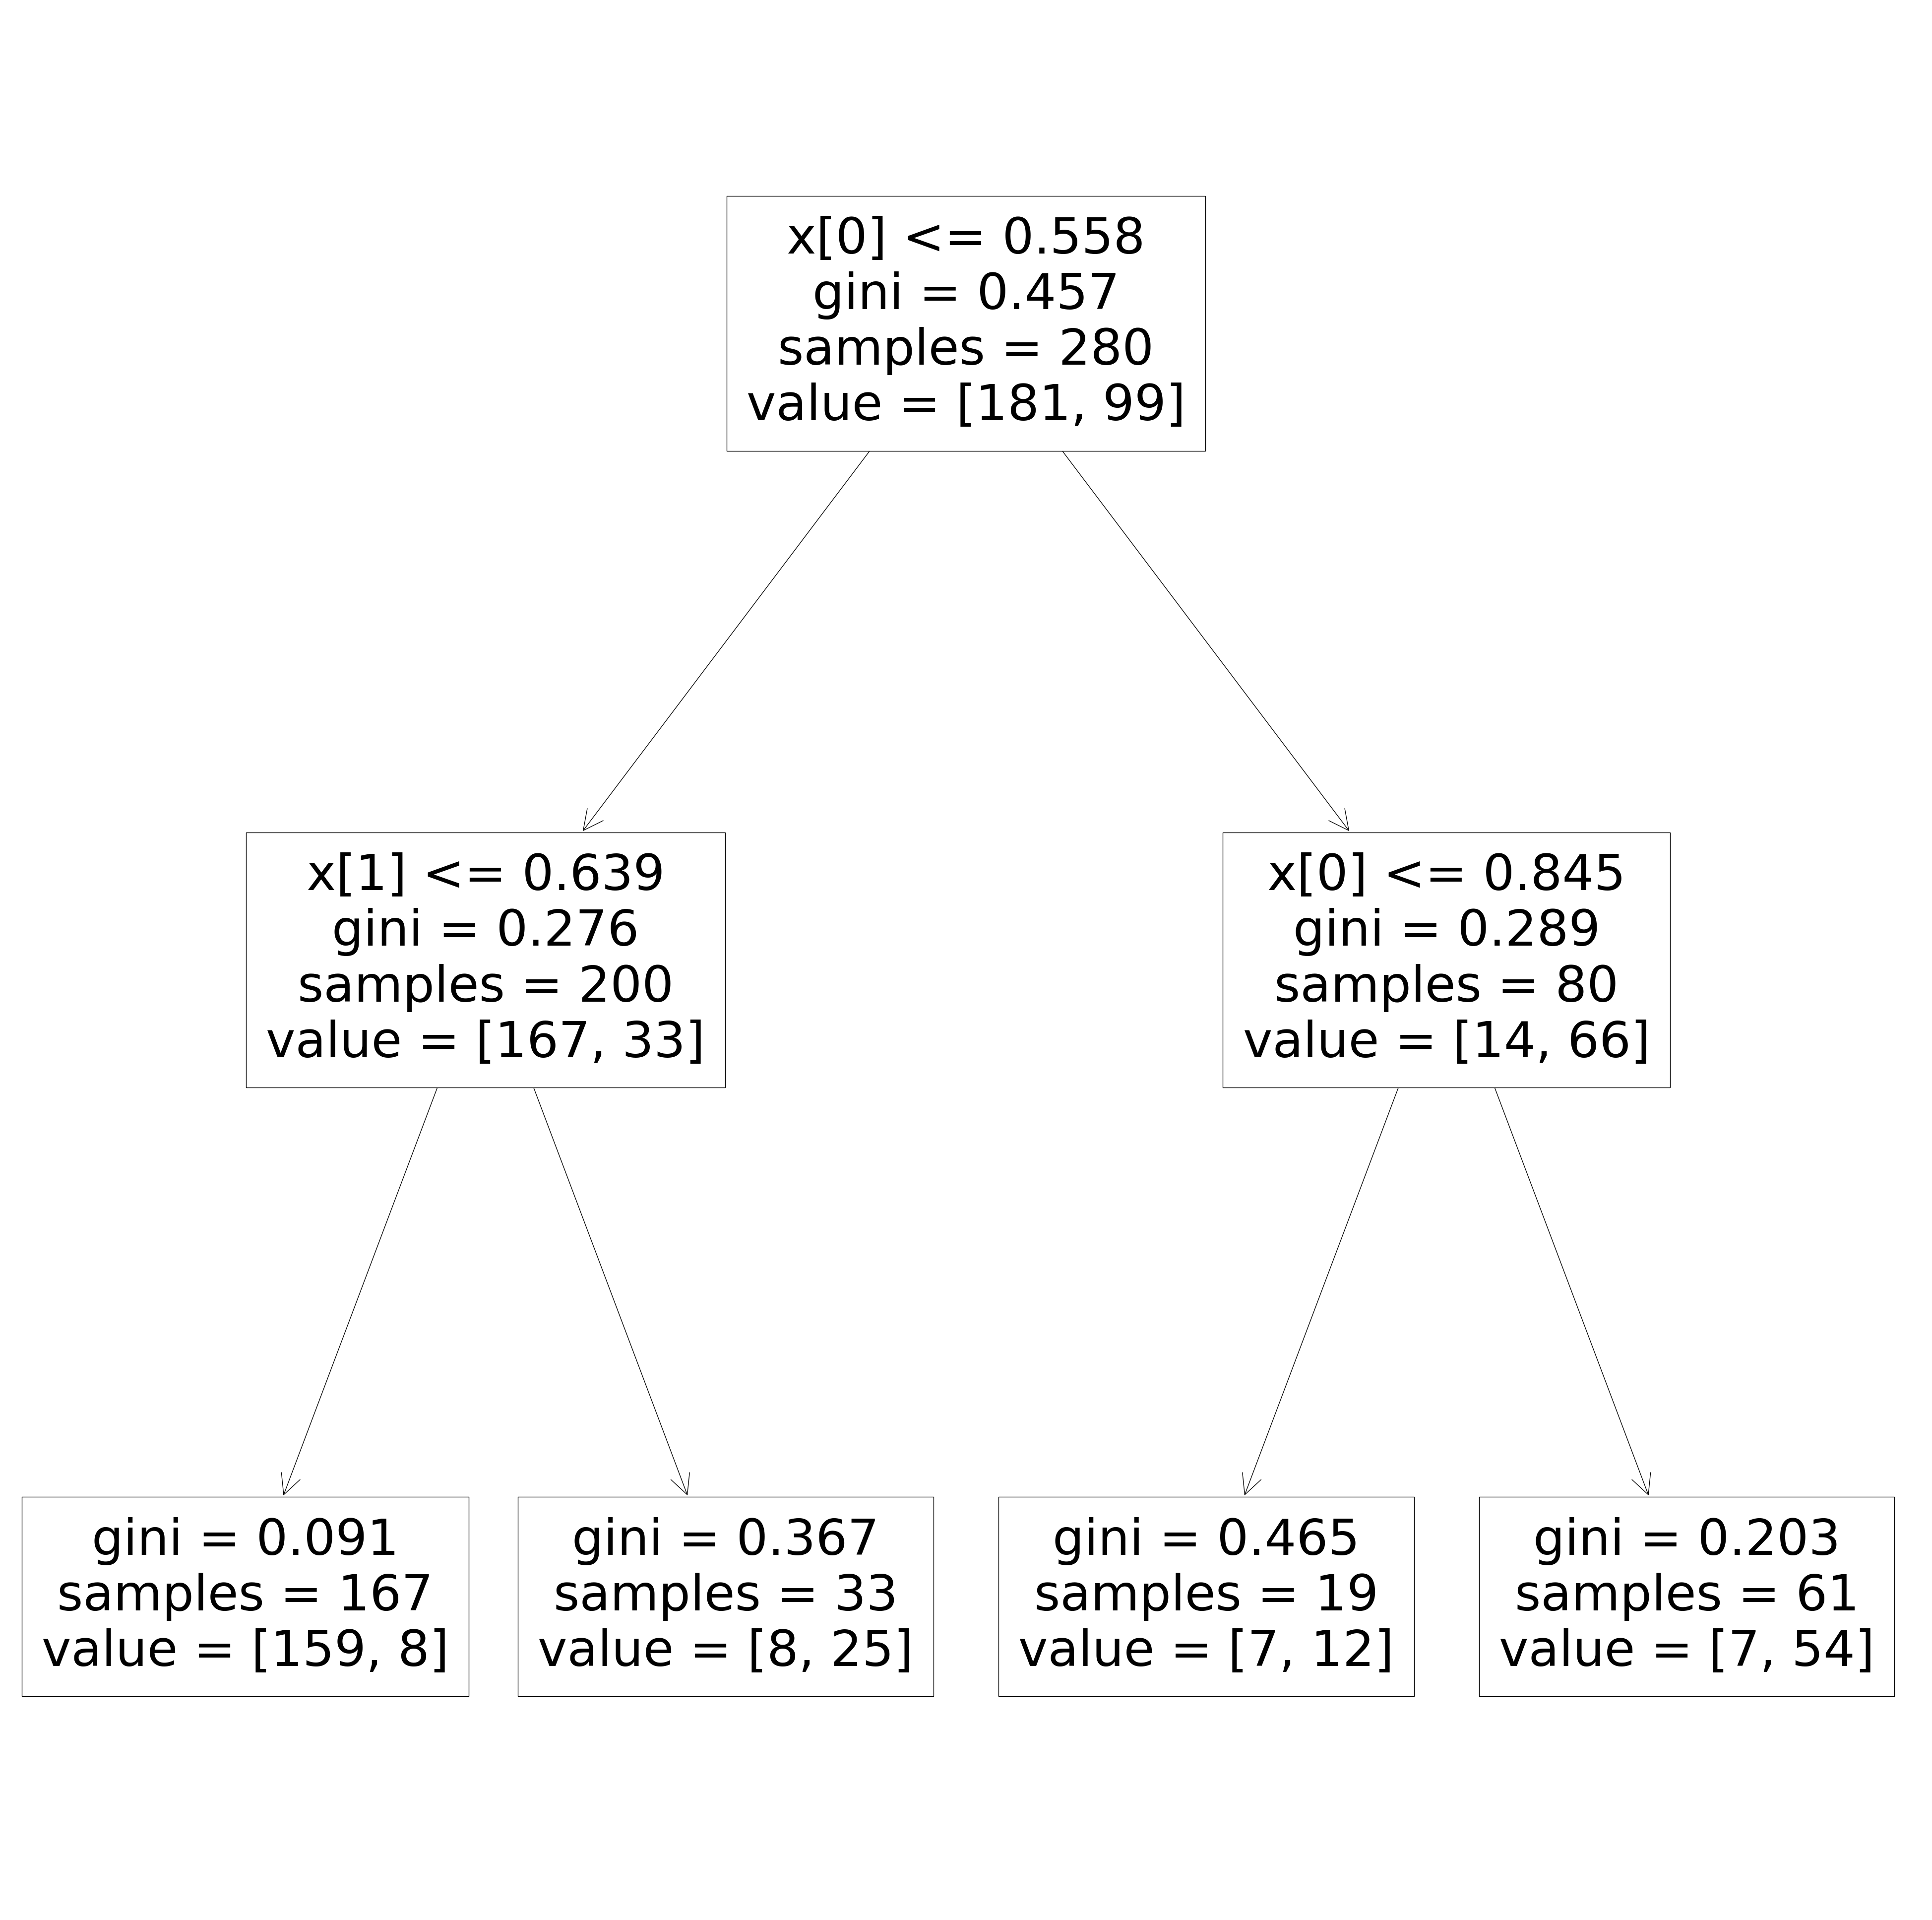

In [36]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [37]:
#Post Pruning
for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

0.8321428571428572 0.85 1
0.8928571428571429 0.9583333333333334 2
0.8964285714285715 0.95 3
0.9178571428571428 0.8916666666666667 4
0.9285714285714286 0.8833333333333333 5
0.9464285714285714 0.9333333333333333 6
0.9607142857142857 0.8916666666666667 7
0.9714285714285714 0.9 8
0.9857142857142858 0.8916666666666667 9
0.9892857142857143 0.8916666666666667 10
0.9928571428571429 0.8833333333333333 11
0.9964285714285714 0.8916666666666667 12
0.9964285714285714 0.8916666666666667 13
0.9964285714285714 0.8916666666666667 14
0.9964285714285714 0.8916666666666667 15
0.9964285714285714 0.8833333333333333 16
0.9964285714285714 0.8916666666666667 17
0.9964285714285714 0.9 18
0.9964285714285714 0.9 19
